In [2]:
# Don't modify this cell.
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
import requests
import time
import math
from scipy import stats
from pprint import pprint

# Import API key
from api_keys import api_key

#import ready packages
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.cryptocurrencies import CryptoCurrencies

In [13]:
#Using existing alpha_vantage packages:

ccb = CryptoCurrencies(key=api_key, output_format='pandas')
b_data, b_meta_data = ccb.get_digital_currency_daily(symbol='BTC', market='USD')

cce = CryptoCurrencies(key=api_key, output_format='pandas')
e_data, e_meta_data = cce.get_digital_currency_daily(symbol='ETH', market='USD')

In [14]:
b_data.head(1)

,1a. open (USD),1b. open (USD),2a. high (USD),2b. high (USD),3a. low (USD),3b. low (USD),4a. close (USD),4b. close (USD),5. volume,6. market cap (USD)
date,,,,,,,,,,
2021-11-08,63273.58,63273.58,64790.0,64790.0,63273.58,63273.58,64671.9,64671.9,5431.57406,5431.57406


In [15]:
b_close = b_data.drop(columns = ['1a. open (USD)', '1b. open (USD)', '2a. high (USD)', '2b. high (USD)',
       '3a. low (USD)', '3b. low (USD)', '4a. close (USD)',
       '5. volume', '6. market cap (USD)'])
e_close = e_data.drop(columns = ['1a. open (USD)', '1b. open (USD)', '2a. high (USD)', '2b. high (USD)',
       '3a. low (USD)', '3b. low (USD)', '4a. close (USD)',
       '5. volume', '6. market cap (USD)'])

In [16]:
b_close = b_close.rename(columns = {'4b. close (USD)' : 'BTC (USD)'})
e_close = e_close.rename(columns = {'4b. close (USD)' : 'ETH (USD)'})
crypto_data = pd.concat([b_close, e_close], axis = 1)
crypto_data.head(1)

,BTC (USD),ETH (USD)
date,,
2021-11-08,64671.9,4671.34


In [17]:
crypto_data.corr()

,BTC (USD),ETH (USD)
BTC (USD),1.000000,0.921622
ETH (USD),0.921622,1.000000


In [23]:
def plot_correlations(data, roll):
    columns = data.columns.to_list()
    
    fig, ax = plt.subplots(2,1, figsize = (15, 9))
    
    ax[0].plot(data.index, data[columns[0]], c = 'r')
    ax[0].set_ylabel(f'Price of {columns[0]}', color = 'r')
    ax[0].tick_params('y', colors = 'r')

    ax2 = ax[0].twinx()
    ax2.plot(data.index, data[columns[1]], c = 'b')
    ax2.set_ylabel(f'Price of {columns[1]}', color = 'b')
    ax2.tick_params('y', colors = 'b')
    
    
    ax[1].plot(data[columns[0]].rolling(window = 45).corr(data[columns[1]]))
    ax[1].axhline(data.corr().iloc[0,1], c = 'r')
    ax[1].set_ylabel('45 day rolling correlation between' '\n' f'{columns[0]} and {columns[1]} prices')
    ax[1].annotate('global correlation coefficient', 
               xy = [pd.Timestamp('2019-01'), data.corr().iloc[0,1]], xytext = [pd.Timestamp('2019-05'), 0.2], arrowprops = {})

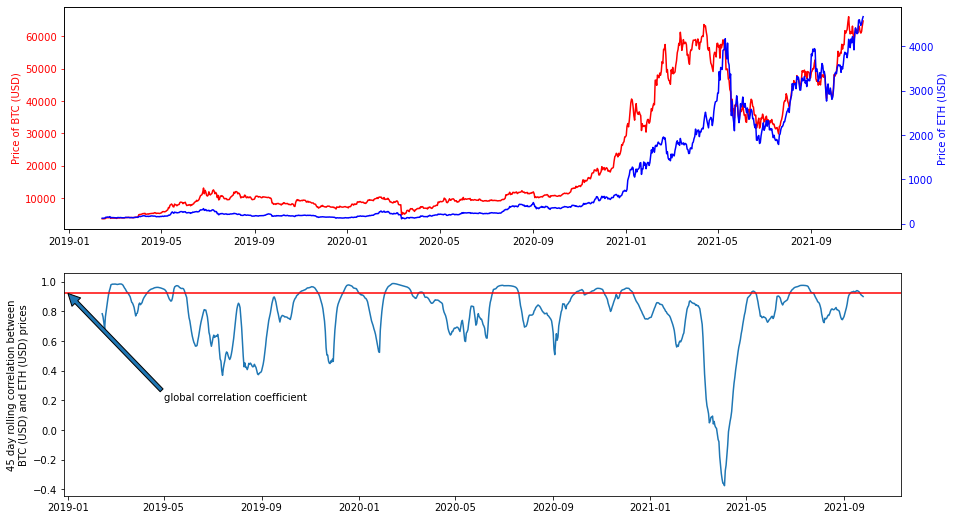

In [24]:
plot_correlations(crypto_data, 45)

In [25]:
ax[1].get_xticklabels()

NameError: name 'ax' is not defined

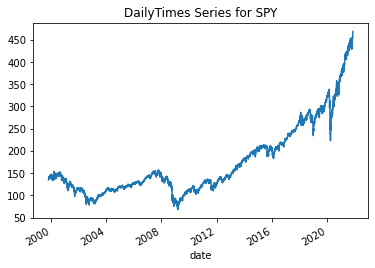

In [20]:
ts = TimeSeries(key= api_key, output_format='pandas')
data, meta_data = ts.get_daily(symbol='SPY', outputsize='full')
data['4. close'].plot()
plt.title('DailyTimes Series for SPY')
plt.show()

In [21]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2021-11-05,469.28,470.6500,466.92,468.53,66390563.0
2021-11-04,465.36,467.0000,464.99,466.91,52847087.0
2021-11-03,461.30,465.1500,460.83,464.72,52509825.0
2021-11-02,460.22,462.2300,460.08,461.90,47840033.0
2021-11-01,460.30,460.7021,458.20,460.04,47474495.0
